<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/week6/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [15]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model1 = get_model()
history_noise = model1.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model2 = get_model()
history_zeros = model2.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model3 = get_model()
history_original = model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6085 - accuracy: 0.8139 - val_loss: 0.3279 - val_accuracy: 0.8958
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2567 - accuracy: 0.9198 - val_loss: 0.2102 - val_accuracy: 0.9348
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1692 - accuracy: 0.9476 - val_loss: 0.1681 - val_accuracy: 0.9486
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1219 - accuracy: 0.9621 - val_loss: 0.1376 - val_accuracy: 0.9611
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0894 - accuracy: 0.9724 - val_loss: 0.1302 - val_accuracy: 0.9637
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.1287 - val_accuracy: 0.9643
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.1181 - val_accuracy: 0.9668
Epoch 

**Plotting a validation accuracy comparison**

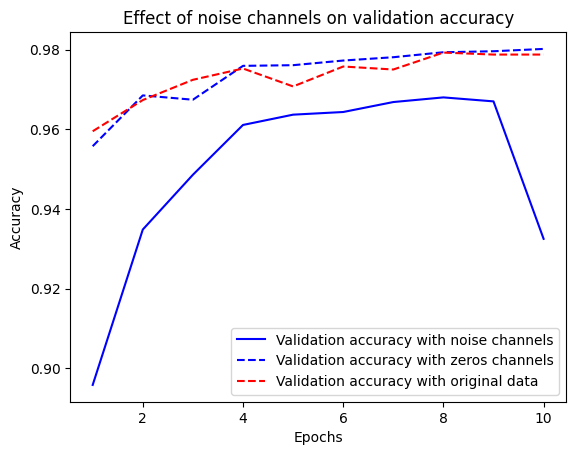

In [18]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [19]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3149 - accuracy: 0.1017 - val_loss: 2.3061 - val_accuracy: 0.1037
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2991 - accuracy: 0.1151 - val_loss: 2.3133 - val_accuracy: 0.1008
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2908 - accuracy: 0.1266 - val_loss: 2.3200 - val_accuracy: 0.0998
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2784 - accuracy: 0.1380 - val_loss: 2.3255 - val_accuracy: 0.1028
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2632 - accuracy: 0.1532 - val_loss: 2.3398 - val_accuracy: 0.0976
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2431 - accuracy: 0.1678 - val_loss: 2.3485 - val_accuracy: 0.1037
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2192 - accuracy: 0.1828 - val_loss: 2.3671 - val_accuracy: 0.0988

Epoch 1/100
375/375 [==============================] - 1s 4ms/step - loss: 2.5143 - accuracy: 0.1059 - val_loss: 2.3036 - val_accuracy: 0.1054
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3078 - val_accuracy: 0.1263
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2998 - accuracy: 0.1124 - val_loss: 2.3006 - val_accuracy: 0.1067
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2977 - accuracy: 0.1128 - val_loss: 2.3027 - val_accuracy: 0.0833
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2957 - accuracy: 0.1146 - val_loss: 2.3043 - val_accuracy: 0.0958
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2927 - accuracy: 0.1167 - val_loss: 2.3021 - val_accuracy: 0.1117
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2897 - accuracy: 0.1171 - val_loss: 2.3096 - val_accuracy: 0.1042

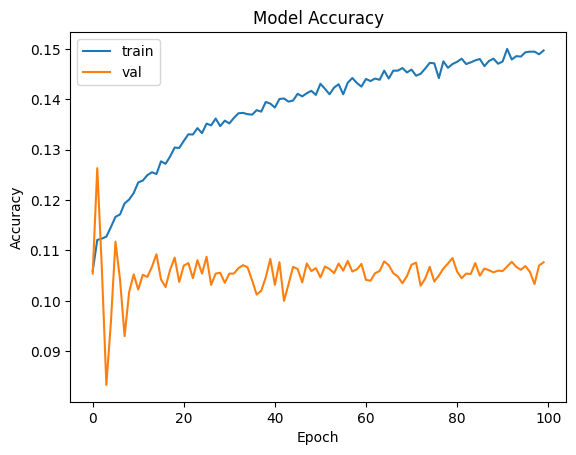

In [30]:
history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [23]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model1.compile(optimizer=keras.optimizers.RMSprop(1.), #Q.From Turning key gradient decent parameters, ... 1 to any other number
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model1.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 666.0514 - accuracy: 0.2758 - val_loss: 2.5600 - val_accuracy: 0.1995
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7005 - accuracy: 0.1565 - val_loss: 2.6557 - val_accuracy: 0.1131
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6570 - accuracy: 0.1429 - val_loss: 2.3149 - val_accuracy: 0.1848
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6514 - accuracy: 0.1399 - val_loss: 2.4188 - val_accuracy: 0.1488
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6173 - accuracy: 0.1407 - val_loss: 2.4270 - val_accuracy: 0.1136
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5101 - accuracy: 0.1430 - val_loss: 2.4504 - val_accuracy: 0.1197
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4322 - accuracy: 0.1443 - val_loss: 2.3402 - val_accuracy: 0.1084
Epoc

In [26]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model2.compile(optimizer=keras.optimizers.RMSprop(5.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 13136.3145 - accuracy: 0.2407 - val_loss: 6.4901 - val_accuracy: 0.1393
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 8.3976 - accuracy: 0.1309 - val_loss: 11.9885 - val_accuracy: 0.1608
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 5.7422 - accuracy: 0.1167 - val_loss: 5.0121 - val_accuracy: 0.1086
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 4.9860 - accuracy: 0.1091 - val_loss: 4.5141 - val_accuracy: 0.1071
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 5.0193 - accuracy: 0.1192 - val_loss: 6.7095 - val_accuracy: 0.1011
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 5.0690 - accuracy: 0.0985 - val_loss: 5.1863 - val_accuracy: 0.1085
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 5.0494 - accuracy: 0.1029 - val_loss: 5.9433 - val_accuracy: 0.1006
E

In [27]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model3 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model3.compile(optimizer=keras.optimizers.RMSprop(10.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model3.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 70976.1250 - accuracy: 0.2773 - val_loss: 16.1448 - val_accuracy: 0.1420
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 52.3929 - accuracy: 0.1120 - val_loss: 10.2529 - val_accuracy: 0.1095
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 14.2355 - accuracy: 0.1109 - val_loss: 13.6468 - val_accuracy: 0.1159
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 10.6852 - accuracy: 0.1088 - val_loss: 12.4555 - val_accuracy: 0.1097
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 11.0162 - accuracy: 0.1104 - val_loss: 15.5812 - val_accuracy: 0.1055
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 10.8780 - accuracy: 0.1055 - val_loss: 10.1165 - val_accuracy: 0.1085
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 11.0570 - accuracy: 0.1074 - val_loss: 13.9731 - val_accura

**The same model with a more appropriate learning rate**

In [29]:
model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model1.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model1.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3296 - accuracy: 0.9125 - val_loss: 0.1500 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9642 - val_loss: 0.1476 - val_accuracy: 0.9638
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0952 - accuracy: 0.9744 - val_loss: 0.1540 - val_accuracy: 0.9693
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0836 - accuracy: 0.9792 - val_loss: 0.1474 - val_accuracy: 0.9710
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9837 - val_loss: 0.1733 - val_accuracy: 0.9703
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9851 - val_loss: 0.1967 - val_accuracy: 0.9669
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0514 - accuracy: 0.9869 - val_loss: 0.2579 - val_accuracy: 0.9625
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary